In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# imports 
from data.lda_data import DataLoader
from lda.lda_model import LDAModel

In [3]:
loader = DataLoader()

In [4]:
print("Number of loaded documents: ", len(loader.data))

Number of loaded documents:  11314


Let's take a look at a random document:

In [5]:
print("Example document:")
print(loader.data[0])

Example document:
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







Preprocessing:

In [6]:
loader.preprocess()

Loading existing preprocessed documents...


Let's take a look at the same document, but now after lemmatization and stemming:

In [7]:
print(loader.processed_docs[0])

['lerxst', 'thing', 'subject', 'nntp', 'post', 'host', 'organ', 'univers', 'maryland', 'colleg', 'park', 'line', 'wonder', 'enlighten', 'door', 'sport', 'look', 'late', 'earli', 'call', 'bricklin', 'door', 'small', 'addit', 'bumper', 'separ', 'rest', 'bodi', 'know', 'tellm', 'model', 'engin', 'spec', 'year', 'product', 'histori', 'info', 'funki', 'look', 'mail', 'thank', 'bring', 'neighborhood', 'lerxst']


We will now build the dictionary

In [8]:
dictionary = loader.build_dictionary()

The size of the dictionary:

In [9]:
len(dictionary)

6591

Let's take a look at the dictionary:

In [10]:
dictionary[6590]

'hollywood'

In [11]:
docs, maxdoclen = loader.filter_docs(dictionary)

In [12]:
print("Example document - filtered:")
print(docs[0])

print("Maximum document length:", maxdoclen)

Example document - filtered:
[29, 20, 11, 30, 17, 5, 21, 31, 9, 6, 27, 15, 14, 7, 4, 6, 25, 0, 3, 24, 23, 1, 13, 18, 8, 26, 32, 22, 10, 12, 15, 16, 28, 2, 19]
Maximum document length: 4621


In [13]:
[dictionary[w] for w in docs[12]]

['nntp',
 'host',
 'hewlett',
 'packard',
 'fort',
 'collin',
 'newsread',
 'version',
 'regard',
 'email',
 'hewlett',
 'packard',
 'east',
 'harmoni',
 'fort',
 'collin']

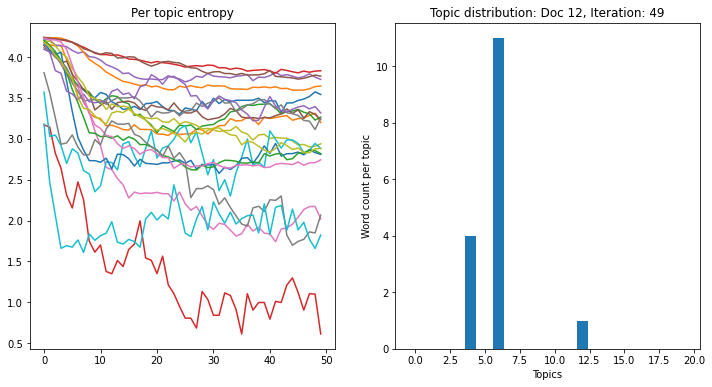

In [14]:
model = LDAModel([1, 2, 5, 10, 20, 50], seed=1234)
model.fit(docs, dictionary, topics_num=20, iterations=50, alpha=0.1, gamma=0.1, max_doc_len=maxdoclen)

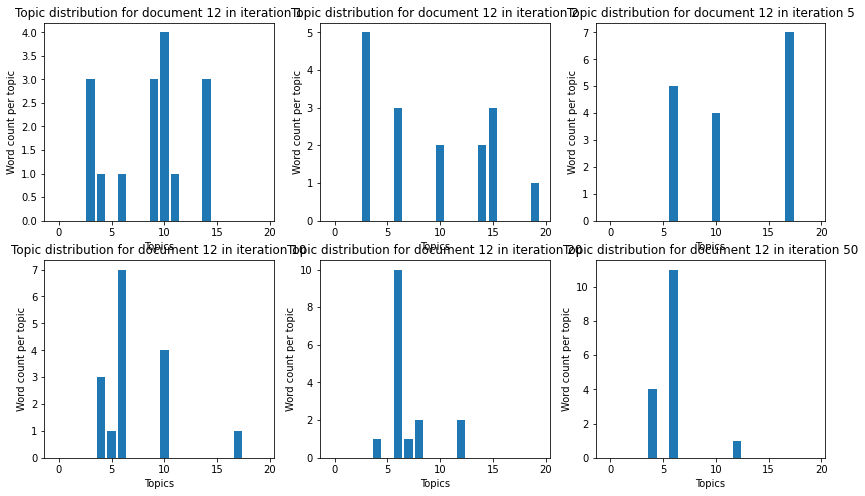

In [15]:
model.plot_topics_distributions()

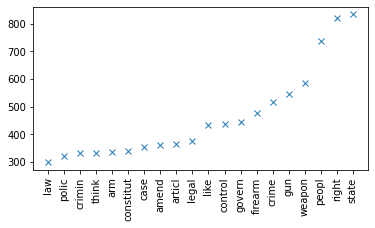

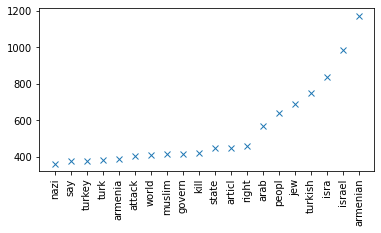

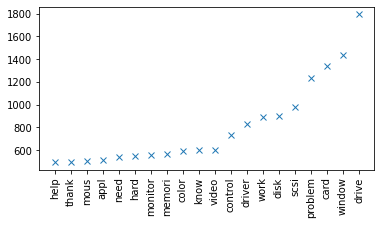

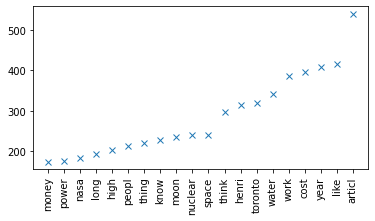

In [16]:
model.plot_top_words(dictionary, [1, 3, 8, 10])